# Taxi Driver Program
Reinforcement Learning algorithm that solves the Taxi-v3 environment from OpenAI gym library

### Two possible modes:
1. User mode: Input parameters to play with optimization
2. Time mode: Input time for algorithm to find a solution

## Functionality
Run all cells, and then run desired mode in last cell of the notebook.
Each mode contains instructions in documentation string

In [1]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
import torch

In [2]:
env = gym.make('Taxi-v3')
env.reset()
env.render()
action_size = env.action_space.n
state_size = env.observation_space.n

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [3]:
# DEFAULT PARAMS
TOTAL_TEST_EP = 100
TOTAL_EP = 1500
MAX_STEPS = 100
LR = 0.81
GAMMA = 0.96
EPSILON = 0.9
MAX_EPSILON = 1.0
MIN_EPSILON = 0.01
DECAY_RATE = 0.01

In [4]:
# MODEL RESULTS
rewards_total = []
steps_total = []
penalties_per_ep_total = []
timestep_per_ep_total = []
q_table = np.zeros((state_size, action_size))

In [5]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def show_run_stats():
    # Rewards over episodes
    plt.figure(figsize=(12,5))
    plt.title("Rewards over episodes")
    plt.bar(torch.arange(len(rewards_total)), rewards_total, alpha=0.6, color='green', width=5)
    ma = moving_average(rewards_total, n=15)
    plt.plot(torch.arange(len(ma)), ma)
    # plt.plot()
    plt.show()

    plt.figure(figsize=(12,5))
    plt.title("Steps over episode")
    # plt.bar(torch.arange(len(steps_total)), steps_total, alpha=0.6, color='red', width=5)
    plt.bar(torch.arange(len(steps_total)), steps_total)
    plt.show()

    plt.figure(figsize=(12,5))
    plt.title("Penalties per episode")
    plt.plot(torch.arange(len(penalties_per_ep_total)), penalties_per_ep_total)
    plt.show()

    plt.figure(figsize=(12,5))
    plt.title("Timestep per episode")
    # plt.bar(torch.arange(len(steps_total)), steps_total, alpha=0.6, color='red', width=5)
    plt.plot(torch.arange((len(timestep_per_ep_total))), timestep_per_ep_total)
    plt.show()

In [6]:
def calculate_q_table(
    total_ep = TOTAL_EP,
    max_steps = MAX_STEPS,
    lr = LR,
    gamma = GAMMA,
    epsilon = EPSILON,
    max_epsilon = MAX_EPSILON,
    min_epsilon = MIN_EPSILON,
    decay_rate = DECAY_RATE
):
    for episode in range(total_ep):

      # Reset Environment:
      state = env.reset()
      step = 0
      done = False

      for step in range(max_steps):

        # Choose an action a in the current world state(s) (step 3)
        # First we randomize a number
        exp_exp_tradeoff = random.uniform(0, 1)

        # If this number > greater than epsilon --> exploitation (taking the biggest q value for the current state):
        if exp_exp_tradeoff > epsilon:
          action = np.argmax(q_table[state, :])

        # Else, doing random choice:
        else:
          action = env.action_space.sample()

        # Take the action (a) and observe the outcome state (s') and the reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        q_table[state, action] = q_table[state, action] + lr * (reward + gamma *
                                        np.max(q_table[new_state, :]) - q_table[state, action])

        # Our new state:
        state = new_state

        # If done True, finish the episode:
        if done:
          break

      # Increment number of episodes:
      episode += 1

      # Reduce epsilon (because we need less and less exploration):
      epsilon = min_epsilon + (max_epsilon - min_epsilon) *np.exp(-decay_rate*episode)
    pass

In [11]:
def run_taxi_driver_with_calculated_q_table(
        total_test_ep=TOTAL_TEST_EP,
        max_steps=MAX_STEPS
):
    if not np.any(q_table):
        calculate_q_table()

    env.reset()
    rewards = []

    for episode in range(total_test_ep):
      state = env.reset()
      step = 0
      done = False
      total_rewards = 0
      total_penalties = 0
      total_timestep = 0
      print('=========================')
      print('EPISODE: ', episode)

      for step in range(max_steps):

        env.render()

        # Take the action based on the Q Table:
        action = np.argmax(q_table[state, :])

        new_state, reward, done, info = env.step(action)

        total_rewards += reward
        total_timestep += 1

        if reward == -10:
            print("PENALTY")
            total_penalties += 1

        # If episode finishes:
        if done:
            steps_total.append(step)
            rewards_total.append(total_rewards)
            timestep_per_ep_total.append(total_timestep)
            penalties_per_ep_total.append(total_penalties)
            # egreedy_total.append(egreedy)
            print('Score: ', total_rewards)
            break

        state = new_state

    env.close()
    print('Score Over Time: {}'.format(sum(rewards)/total_test_ep))


In [12]:
def run_program():
    run_taxi_driver_with_calculated_q_table()
    pass

def user_mode(
    total_ep = TOTAL_EP,
    max_steps = MAX_STEPS,
    lr = LR,
    gamma = GAMMA,
    epsilon = EPSILON,
    max_epsilon = MAX_EPSILON,
    min_epsilon = MIN_EPSILON,
    decay_rate = DECAY_RATE
):
    calculate_q_table(
        total_ep = total_ep,
        max_steps = max_steps,
        lr = lr,
        gamma = gamma,
        epsilon = epsilon,
        max_epsilon = max_epsilon,
        min_epsilon = min_epsilon,
        decay_rate = decay_rate
    )
    run_taxi_driver_with_calculated_q_table()
    pass

def time_mode(steps=TOTAL_TEST_EP):
    run_taxi_driver_with_calculated_q_table(steps)
    pass

In [13]:
# user_mode(
#     total_ep=,
#     max_steps=,
#     lr=,
#     gamma=,
#     epsilon=,
#     max_epsilon=,
#     min_epsilon=,
#     decay_rate=
# )

time_mode(
    steps=200
)

EPISODE:  0
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |

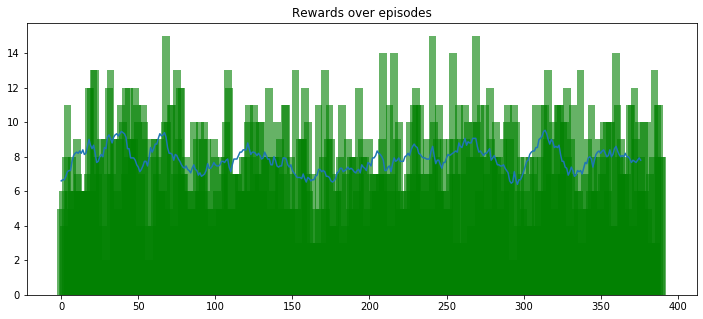

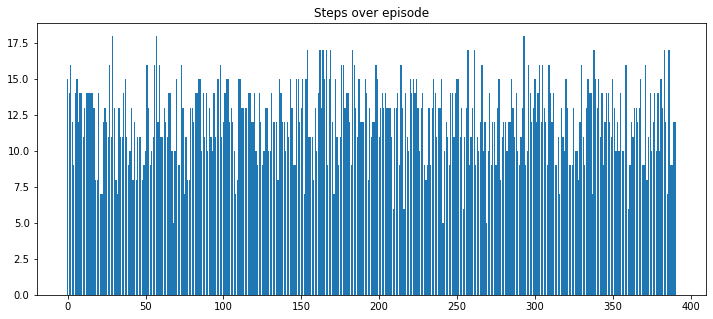

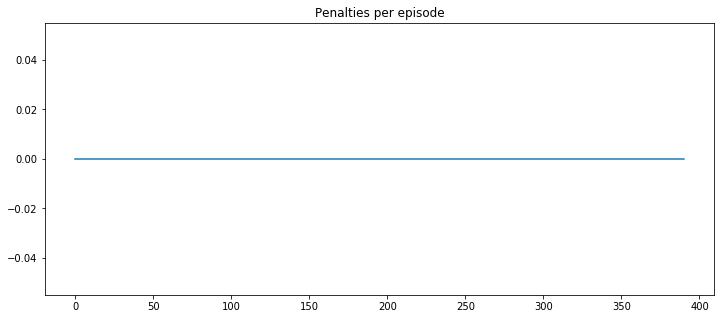

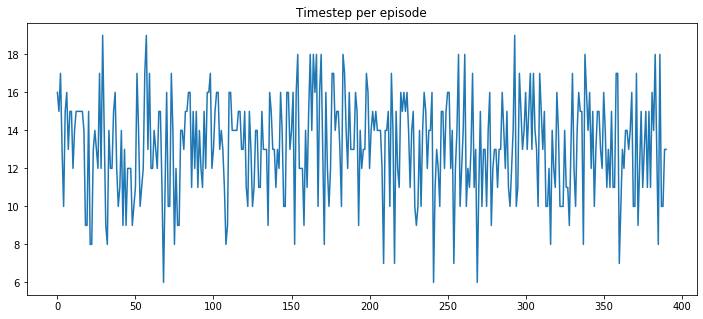

In [14]:
show_run_stats()